# Comando da Questão A: sample distribution and sampling distribution

A partir do que foi feito na Atividade 2 “Considerando o primeiro trabalho, defina um experimento em que dados são coletados de uma variável de interesse do seu trabalho”, crie  uma população artificial dessa variável com uma distribuição Gaussiana e demonstre sample distribution and sampling distribution. Faça avaliações de probabilidade de possíveis eventos.


Vamos assumir que, na _população_ de todos os possíveis usos dessa ferramenta para a tarefa específica por todos os desenvolvedores potenciais, o tempo de conclusão segue uma Distribuição Gaussiana (Normal).

Para isso, vamos criar uma grande população artificial para simular todos os tempos possíveis, seguindo a distribuição Normal que foi definida anteriormente:

Média Populacional (μ): 30 minutos

Desvio Padrão Populacional (σ): 5 minutos

Tamanho da População (Simulada): N=100,000 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd

# Parâmetros da População
pop_mean = 30  # mu
pop_std_dev = 5 # sigma
population_size = 100000

# Gerar a população artificial
np.random.seed(42) # Para reprodutibilidade
population_times = np.random.normal(loc=pop_mean, scale=pop_std_dev, size=population_size)

# Plotar a distribuição da população
plt.figure(figsize=(10, 6))
plt.hist(population_times, bins=50, density=True, alpha=0.7, color='gray', label=f'População (N={population_size})')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, pop_mean, pop_std_dev)
plt.plot(x, p, 'k', linewidth=2, label=f'Distribuição Normal Teórica\n($\mu={pop_mean}, \sigma={pop_std_dev}$)')
plt.title('Distribuição da População Artificial\n(Tempo de Conclusão da Tarefa - Minutos)')
plt.xlabel('Tempo de Conclusão (minutos)')
plt.ylabel('Densidade de Probabilidade')
plt.legend()
plt.grid(axis='y', alpha=0.5)
plt.show()

print(f"Média da População Simulada: {np.mean(population_times):.4f} (Esperado: {pop_mean})")
print(f"Desvio Padrão da População Simulada: {np.std(population_times):.4f} (Esperado: {pop_std_dev})")

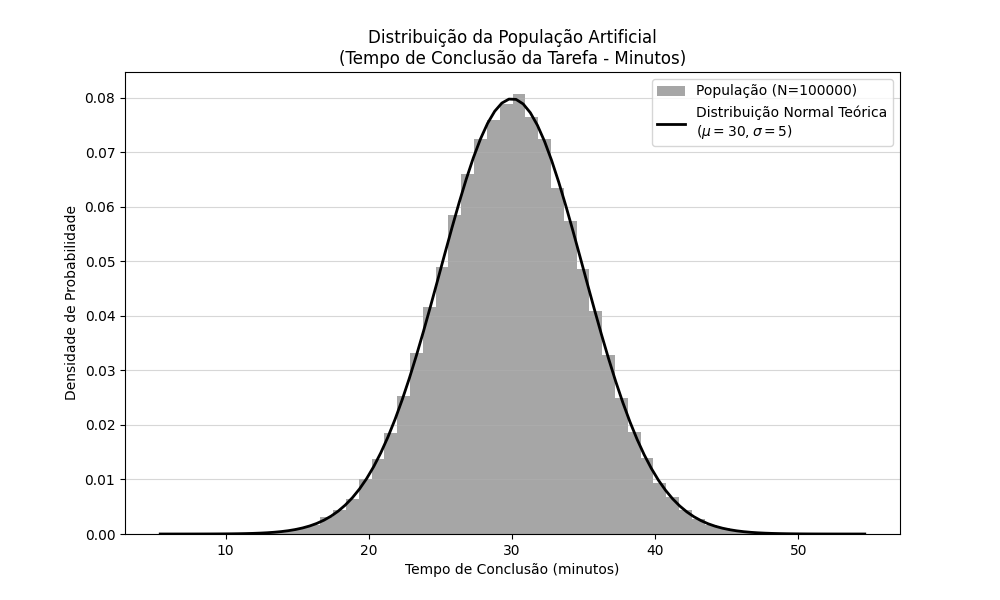

O histograma da população se assemelha muito à curva Normal teórica, como esperado .A média e o desvio padrão da população simulada são muito próximos dos valores teóricos μ=30 e σ=5.

Em um estudo real, não temos acesso a toda a população. Coletamos uma *amostra*. Vamos simular a coleta de uma amostra de n=30 desenvolvedores. A distribuição dos tempos dentro dessa amostra específica é a distribuição da amostra.